## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

## Get the Data

Set index_col=0 to use the first column as the index.

In [2]:
df = pd.read_csv("Classificaiton_3.csv",index_col=0)

In [3]:
df.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1636.6706142430205 to 1287.1500253834342
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GWYH          1000 non-null   float64
 1   TRAT          1000 non-null   float64
 2   TLLZ          1000 non-null   float64
 3   IGGA          1000 non-null   float64
 4   HYKR          1000 non-null   float64
 5   EDFS          1000 non-null   float64
 6   GUUB          1000 non-null   float64
 7   MGJM          1000 non-null   float64
 8   JHZC          1000 non-null   float64
 9   TARGET CLASS  1000 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 85.9 KB


In [5]:
df.describe()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1636.6706142430205 to 1287.1500253834342
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GWYH          1000 non-null   float64
 1   TRAT          1000 non-null   float64
 2   TLLZ          1000 non-null   float64
 3   IGGA          1000 non-null   float64
 4   HYKR          1000 non-null   float64
 5   EDFS          1000 non-null   float64
 6   GUUB          1000 non-null   float64
 7   MGJM          1000 non-null   float64
 8   JHZC          1000 non-null   float64
 9   TARGET CLASS  1000 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 85.9 KB


In [7]:
df.mean()

GWYH             991.851567
TRAT            1529.373525
TLLZ             495.107156
IGGA             940.590072
HYKR            1550.637455
EDFS            1561.003252
GUUB             561.346117
MGJM            1089.067338
JHZC            1452.521629
TARGET CLASS       0.500000
dtype: float64

<Axes: >

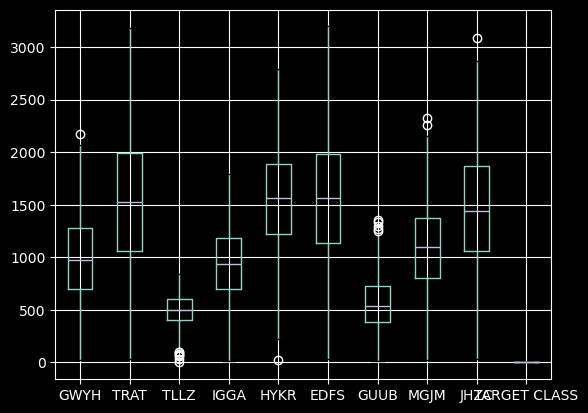

In [8]:
df.boxplot()

In [9]:
# Replacing Outliers
def replace_outliers(df, column_name):
    # Calculateing the 5th and 95th percentiles
    for i in column_name:
        lower_bound = df[i].quantile(0.05)
        upper_bound = df[i].quantile(0.95)
        
        # Replace values below the 5th percentile with the 5th percentile value
        df[i] = df[i].apply(lambda x: lower_bound if x < lower_bound else x)
        
        # Replace values above the 95th percentile with the 95th percentile value
        df[i] = df[i].apply(lambda x: upper_bound if x > upper_bound else x)
    
    return df

In [10]:
replace_outliers(df, df.columns)

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1013.402760,577.587332,2612.007144,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
1300.035501,820.518697,2025.854469,525.562292,922.206261,2353.222182,818.676686,845.491492,1749.528428,1647.186291,1
1059.347542,1066.866418,612.000041,480.827789,419.467495,686.775799,852.867810,341.664784,1154.391368,1450.935357,0
1018.340526,1313.679056,950.622661,720.902459,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
...,...,...,...,...,...,...,...,...,...,...
1343.060600,1289.142057,500.206011,567.564764,1000.953905,919.602401,578.044202,668.007397,1124.772996,2127.628290,0
938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,447.380047,567.200545,1
921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912,1


<Axes: >

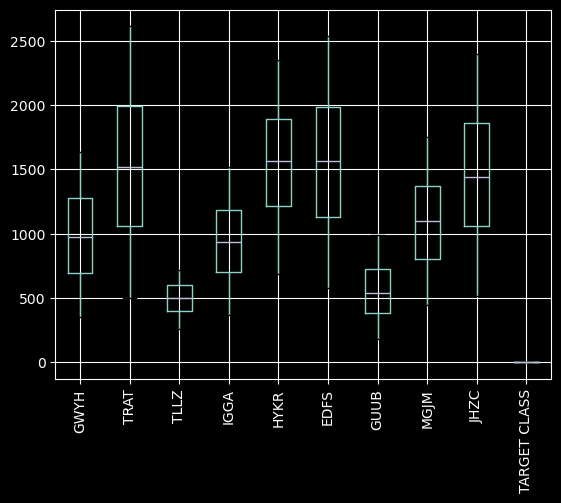

In [11]:
df.boxplot(rot=90)

In [12]:
X=df.drop('TARGET CLASS',axis=1)


In [13]:
y = pd.DataFrame(df['TARGET CLASS'])
type(y)

pandas.core.frame.DataFrame

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(X)

StandardScaler()

In [16]:
X_scaled = scaler.transform(X)

In [17]:
X_scaled = pd.DataFrame(X_scaled,columns=df.columns[:-1])
X_scaled.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-0.461487,1.715179,-1.058711,-1.208594,0.144588,1.058906,-0.992789,1.097736,-1.133306
1,-1.112647,1.791204,-1.654492,0.676870,1.157380,-1.264023,-0.484170,0.285198,-1.103539
2,-0.454634,0.822718,0.219844,-0.062159,1.743225,-1.326354,1.255936,1.783227,0.363903
3,0.212633,-1.513358,-0.122204,-1.612387,-1.884526,-1.264987,-0.945011,0.181180,-0.002444
4,0.881159,-0.953860,1.713447,-0.306193,-0.395983,-1.170576,0.437403,-1.474153,0.835559


## Train Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,
                                                    test_size=0.30)

## Using KNN

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)

In [20]:
knn.fit(X_train,y_train)

c:\Users\prakhar\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [21]:
pred = knn.predict(X_test)

## Predictions and Evaluations

In [22]:
print(confusion_matrix(y_test,pred))

[[108  34]
 [ 27 131]]


In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       142
           1       0.79      0.83      0.81       158

    accuracy                           0.80       300
   macro avg       0.80      0.79      0.80       300
weighted avg       0.80      0.80      0.80       300



Here we can see that that after arouns K>12 the error rate just have less Let's retrain the model with that and check the classification report!

In [27]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[108  34]
 [ 27 131]]


              precision    recall  f1-score   support

           0       0.80      0.76      0.78       142
           1       0.79      0.83      0.81       158

    accuracy                           0.80       300
   macro avg       0.80      0.79      0.80       300
weighted avg       0.80      0.80      0.80       300



c:\Users\prakhar\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [29]:
# NOW WITH K=13
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=13')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=13


[[110  32]
 [ 28 130]]


              precision    recall  f1-score   support

           0       0.80      0.77      0.79       142
           1       0.80      0.82      0.81       158

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



c:\Users\prakhar\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


 the model achieves an accuracy of 83%, demonstrating strong performance in identifying Class 0, with a precision of 0.83 and a recall of 0.99. However, the performance for Class 1 is significantly lower, with a precision of 0.47 and a recall of just 0.04, indicating difficulty in correctly predicting this class. The macro averages suggest a disparity in class performance, with the weighted averages highlighting the model's overall strength in predicting Class 0 while struggling with Class 1

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
dtree = DecisionTreeClassifier()

In [32]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [33]:
predictions = dtree.predict(X_test)

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       142
           1       0.75      0.78      0.77       158

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



In [35]:
print(confusion_matrix(y_test,predictions))

[[102  40]
 [ 35 123]]



The model demonstrates a balanced performance with an accuracy of 72%, reflecting a trade-off between precision and recall. Class 0 has a precision of 0.68 and a recall of 0.78, while Class 1 shows slightly higher precision at 0.77 but lower recall at 0.65, indicating challenges in correctly identifying the positive class. Overall, the macro and weighted averages reinforce consistent performance across both classes

Ploting Decision Tree

In [36]:
clf = DecisionTreeClassifier(criterion='gini', random_state=0,max_depth = 1)

In [37]:
pd.DataFrame({'features':dtree.feature_names_in_, 'importance':dtree.feature_importances_})

,features,importance
0,GWYH,0.176281
1,TRAT,0.286951
2,TLLZ,0.064708
3,IGGA,0.082931
4,HYKR,0.052746
5,EDFS,0.098686
6,GUUB,0.077498
7,MGJM,0.056107
8,JHZC,0.104093


[Text(0.44026774497487436, 0.9642857142857143, 'TRAT <= -0.358\ngini = 0.5\nsamples = 700\nvalue = [358, 342]\nclass = N'),
 Text(0.166143216080402, 0.8928571428571429, 'GWYH <= -0.797\ngini = 0.328\nsamples = 276\nvalue = [219, 57]\nclass = N'),
 Text(0.05025125628140704, 0.8214285714285714, 'IGGA <= -0.316\ngini = 0.489\nsamples = 40\nvalue = [17, 23]\nclass = Y'),
 Text(0.03015075376884422, 0.75, 'GWYH <= -1.059\ngini = 0.305\nsamples = 16\nvalue = [13, 3]\nclass = N'),
 Text(0.020100502512562814, 0.6785714285714286, 'HYKR <= -1.592\ngini = 0.133\nsamples = 14\nvalue = [13, 1]\nclass = N'),
 Text(0.010050251256281407, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(0.03015075376884422, 0.6071428571428571, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = N'),
 Text(0.04020100502512563, 0.6785714285714286, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Y'),
 Text(0.07035175879396985, 0.75, 'MGJM <= 1.14\ngini = 0.278\nsamples = 24\nvalue = [4, 20

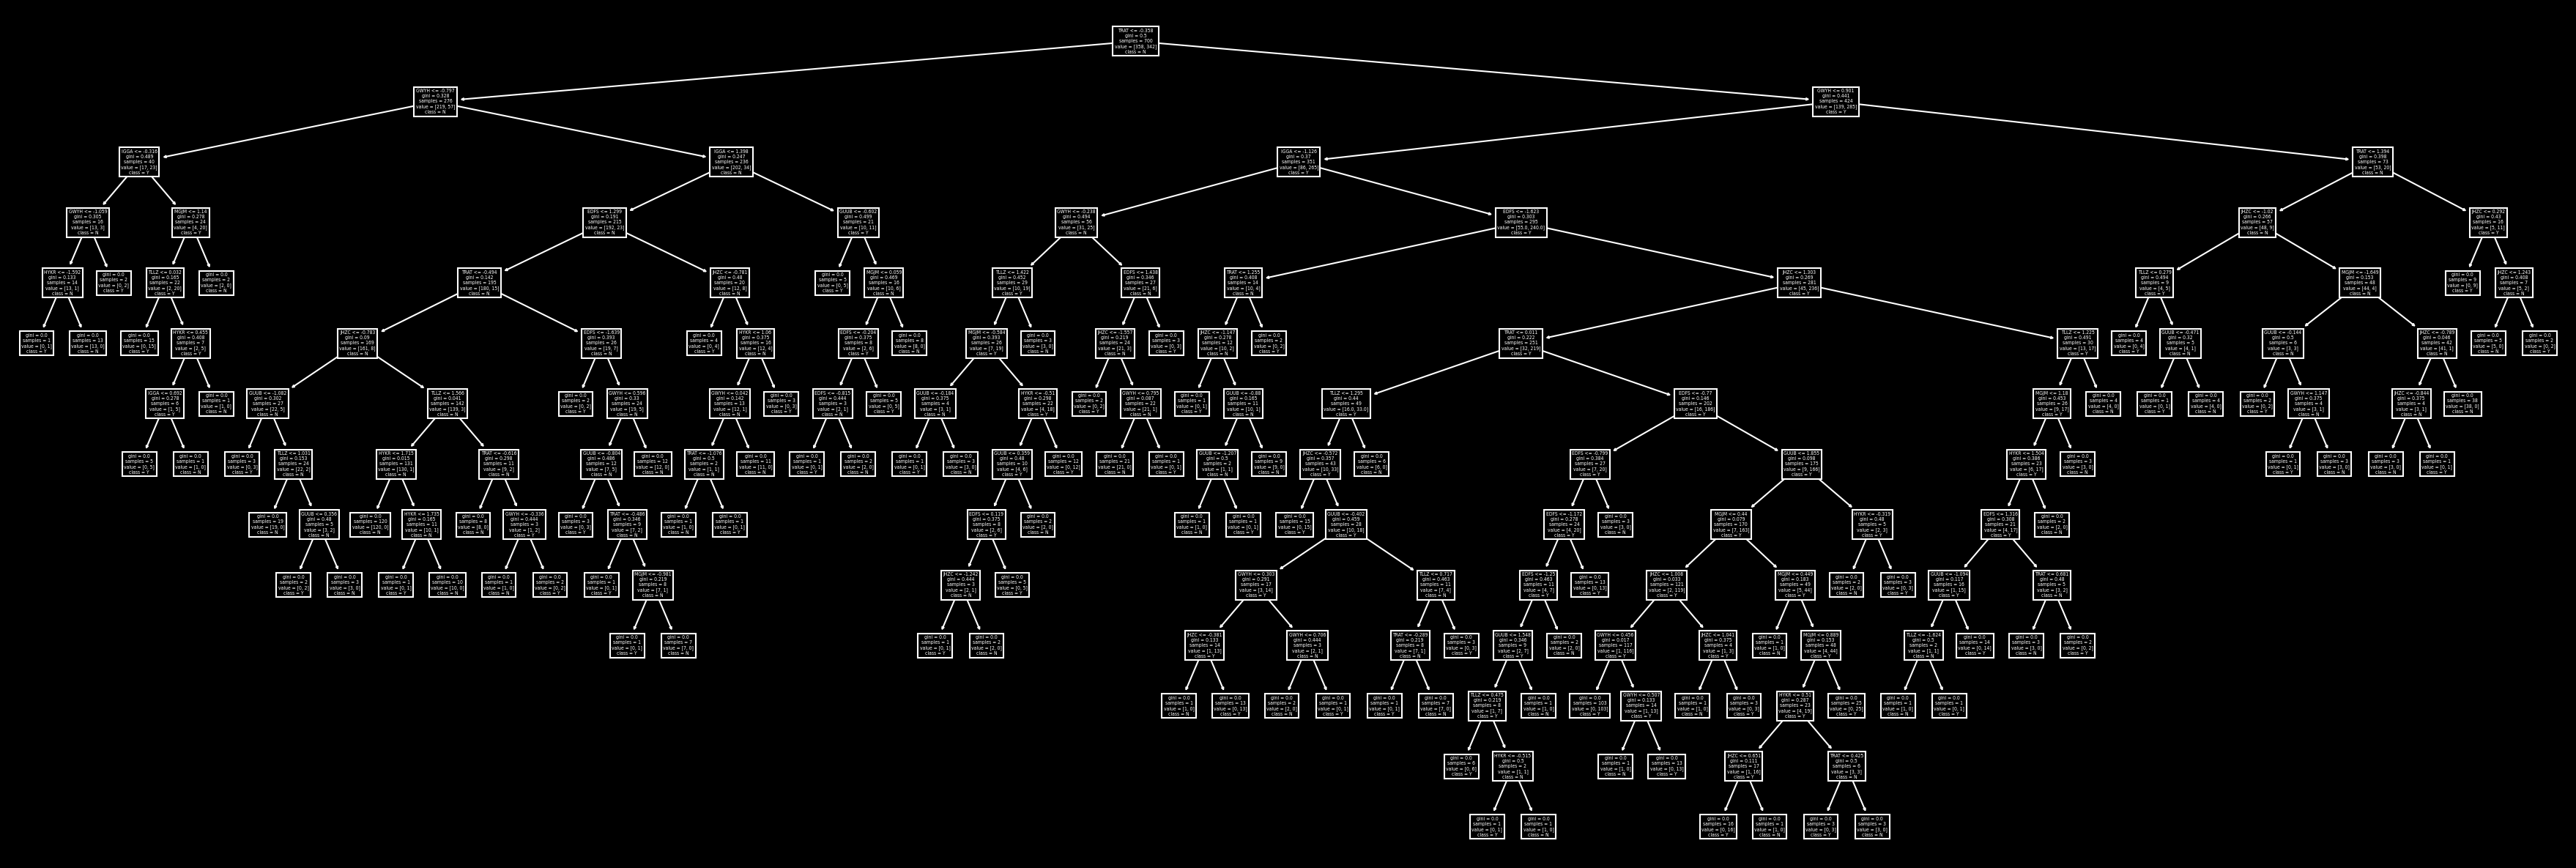

In [38]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,10), dpi=150)
plot_tree(dtree, feature_names=X.columns, class_names=['N','Y'])

# Logistic Regression

In [39]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\Users\prakhar\anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [40]:
predictions = logmodel.predict(X_test)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       142
           1       0.82      0.84      0.83       158

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



In [43]:
X_test['prob'] = logmodel.predict_proba(X_test)[:, 1]
X_test['prob']

860    0.986295
317    0.128763
698    0.981214
256    0.194702
884    0.124444
         ...   
581    0.963540
544    0.672753
992    0.929690
765    0.083067
380    0.914080
Name: prob, Length: 300, dtype: float64

In [44]:
df_ROC = pd.DataFrame(columns=['Threshold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'FPR'])

In [45]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
for threshold in np.arange(0, 1.1, 0.1):
    y_pred = (X_test['prob'] > threshold).astype(int)
    cm = confusion_matrix(y_test,predictions)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    df_ROC.loc[len(df_ROC)] = pd.Series({'Threshold': threshold, 
                                         'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 
                                         'TPR': TPR, 'FPR': FPR, 'auc_score':roc_auc_score(y_test,predictions)})

In [46]:
auc = roc_auc_score(y_test, X_test['prob'])

In [47]:
print(df_ROC)
print('AUC:', auc)

    Threshold     TP     TN    FP    FN       TPR       FPR
0         0.0  132.0  114.0  28.0  26.0  0.835443  0.197183
1         0.1  132.0  114.0  28.0  26.0  0.835443  0.197183
2         0.2  132.0  114.0  28.0  26.0  0.835443  0.197183
3         0.3  132.0  114.0  28.0  26.0  0.835443  0.197183
4         0.4  132.0  114.0  28.0  26.0  0.835443  0.197183
5         0.5  132.0  114.0  28.0  26.0  0.835443  0.197183
6         0.6  132.0  114.0  28.0  26.0  0.835443  0.197183
7         0.7  132.0  114.0  28.0  26.0  0.835443  0.197183
8         0.8  132.0  114.0  28.0  26.0  0.835443  0.197183
9         0.9  132.0  114.0  28.0  26.0  0.835443  0.197183
10        1.0  132.0  114.0  28.0  26.0  0.835443  0.197183
AUC: 0.8993136031378142


The model consistently identifies 133 true positives (TP) and 118 true negatives (TN) across all thresholds, resulting in a stable true positive rate (TPR) of 0.85 and a false positive rate (FPR) of approximately 0.18. The AUC score of 0.89 indicates strong overall performance in distinguishing between the positive and negative classes

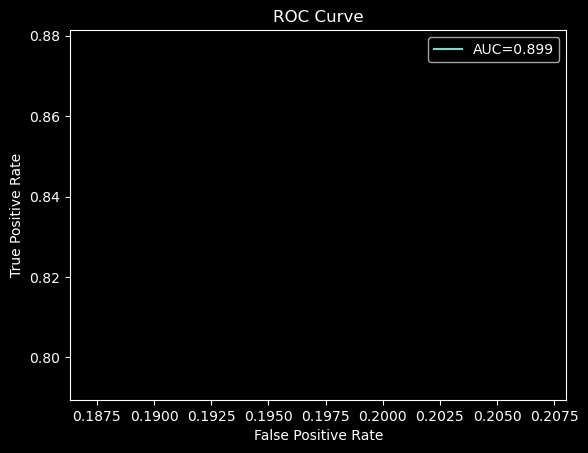

In [48]:
plt.plot(df_ROC['FPR'], df_ROC['TPR'], label=f'AUC={auc:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()